## Solemne 1 MACHINE LEARNING
Gonzalo Muñoz Hermosilla (20919573-9)

## DESCARGAR DATOS

In [1]:
# Esta celda descarga los datos

!wget https://raw.githubusercontent.com/matgreco/MLA/master/semana2/labeled_songs.csv
!wget https://raw.githubusercontent.com/matgreco/MLA/master/semana2/spotify_dataset.csv
!wget https://raw.githubusercontent.com/matgreco/MLA/master/semana2/user_preferences.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## IMPORTAR DATOS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
labeled_songs = pd.read_csv("labeled_songs.csv",engine='python')
spotify_dataset = pd.read_csv("spotify_dataset.csv",engine='python')
user_preferences = pd.read_csv("user_preferences.csv",engine='python')

## CLUSTERING METODO K-MEANS

Eliminacion de columnas object

In [2]:
columnas_a_eliminar = ['Unnamed: 0.1','song_index', 'type','id','uri','track_href','analysis_url','song_name','genre','title','Unnamed: 0']
labeled_songs_variable=labeled_songs.drop(columnas_a_eliminar, axis=1)

In [3]:
labeled_songs_variable.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.642853,0.759599,5.746667,-6.396040,0.493333,0.136860,0.117562,0.278012,0.204257,0.356676,145.917067,253975.913333,3.966667
std,0.159452,0.200238,3.610549,3.689538,0.501630,0.135879,0.209459,0.379094,0.158467,0.223722,23.318364,105495.225493,0.336118
min,0.176000,0.014800,0.000000,-32.929000,0.000000,0.027500,0.000004,0.000000,0.040000,0.030700,88.031000,77584.000000,1.000000
25%,0.537000,0.638000,2.000000,-8.363250,0.000000,0.048600,0.002670,0.000000,0.103000,0.153250,128.006500,180571.250000,4.000000
50%,0.659500,0.820500,6.000000,-5.883500,0.000000,0.071400,0.021550,0.001930,0.136000,0.347500,143.008500,223771.500000,4.000000
75%,0.766750,0.923250,9.000000,-4.283000,1.000000,0.193250,0.116000,0.743750,0.274250,0.531750,156.518250,303119.750000,4.000000
max,0.950000,0.997000,11.000000,0.672000,1.000000,0.877000,0.955000,0.968000,0.924000,0.884000,200.068000,597055.000000,5.000000


## Normalizar datos

Se crea una variable con los datos normalizados labeled_songs_normalizado

In [4]:
labeled_songs_normalizado=(labeled_songs_variable-labeled_songs_variable.min())/(labeled_songs_variable.max()-labeled_songs_variable.min())
labeled_songs_normalizado

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.748062,0.556099,0.000000,0.706854,1.0,0.022602,0.001965,0.009700,0.304299,0.302707,0.241188,0.174143,0.75
1,0.439276,0.645693,0.545455,0.851820,0.0,0.195998,0.618847,0.000018,0.171946,0.378882,0.553719,0.244895,0.50
2,0.590439,0.932804,0.363636,0.826077,0.0,0.007887,0.048687,0.978306,0.075792,0.227704,0.285388,0.374258,0.75
3,0.786822,0.434942,0.727273,0.591292,0.0,0.490288,0.116227,0.000069,0.141403,0.490214,0.820533,0.142070,0.75
4,0.879845,0.729179,0.090909,0.790899,1.0,0.056386,0.086070,0.000376,0.321267,0.677722,0.463874,0.144947,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.310078,0.990837,0.090909,0.859617,0.0,0.045203,0.004865,0.107438,0.447964,0.356615,0.553460,0.321904,0.75
146,0.519380,0.950112,0.090909,0.880123,0.0,0.020483,0.002666,0.079752,0.376697,0.374194,0.552907,0.404673,0.75
147,0.421189,0.993891,0.454545,0.851046,0.0,0.250147,0.005797,0.000205,0.486425,0.057424,0.553371,0.235655,0.75
148,0.284238,0.872735,0.090909,0.851433,1.0,0.022955,0.219892,0.000000,0.106335,0.109340,0.554451,0.223579,0.50


## METODO DEL CODO PARA CALCULAR CLUSTERS OPTIMO

Similitud de los datos de los cluster

In [5]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init=10, max_iter = 300)
    kmeans.fit(labeled_songs_normalizado)
    wcss.append(kmeans.inertia_)

Grafico del codo

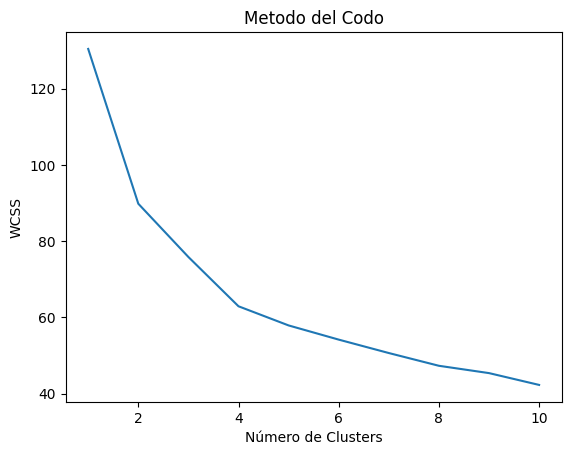

In [6]:
plt.plot(range(1,11), wcss)
plt.title("Metodo del Codo")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

Entre 2 y 4 se forma el codo lo que significa que los cluster optimos se encuentran en ese rango

## Aplicacion de K-means a labeled_songs

Usé 2 clusters

In [7]:
clustering = KMeans(n_clusters = 2,n_init = 10, max_iter = 300)
clustering.fit(labeled_songs_normalizado)

KMeans(n_clusters=2, n_init=10)

Se añade columna nueva con los resultados de los clusters

In [8]:
labeled_songs['KMeans_Clusters'] = clustering.labels_

## Grafico de Clusters

In [9]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_labeled= pca.fit_transform(labeled_songs_normalizado)
pca_labeled_df = pd.DataFrame(data = pca_labeled, columns = ['Componente_1', 'Componente_2'])
pca_stats_genre = pd.concat([pca_labeled_df, labeled_songs[['KMeans_Clusters']]], axis=1)

pca_stats_genre

,Componente_1,Componente_2,KMeans_Clusters
0,-0.711165,-0.157347,1
1,0.407892,-0.471734,0
2,0.506230,0.631249,0
3,0.425450,-0.566212,0
4,-0.701725,-0.298485,1
...,...,...,...
145,0.297924,-0.139794,0
146,0.289683,-0.164232,0
147,0.421279,-0.219639,0
148,-0.614073,-0.081172,1


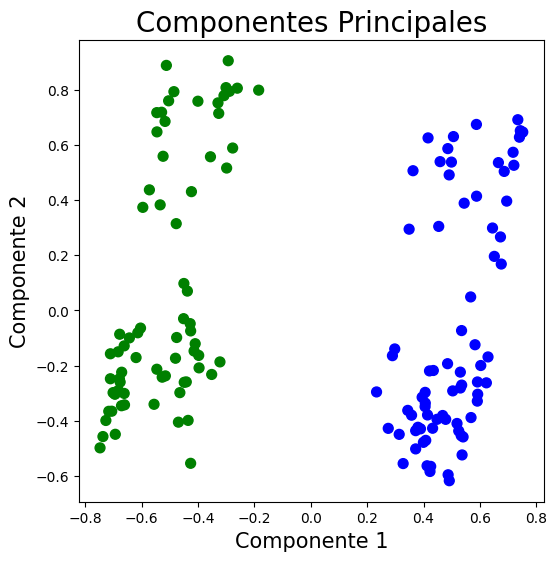

In [10]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)
color_theme = np.array(["blue","green","orange","red"])
ax.scatter(x = pca_stats_genre.Componente_1, y = pca_stats_genre.Componente_2, c=color_theme[pca_stats_genre.KMeans_Clusters], s= 50)

plt.show()

## Clustering Jerárquico

**Valores del data frame para analizarlos**

In [11]:
Canciones_stats = labeled_songs_normalizado.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12]].values
Canciones_stats

array([[0.74806202, 0.55609855, 0.        , ..., 0.24118818, 0.17414254,
        0.75      ],
       [0.43927649, 0.64569334, 0.54545455, ..., 0.55371886, 0.24489529,
        0.5       ],
       [0.59043928, 0.93280391, 0.36363636, ..., 0.28538786, 0.37425766,
        0.75      ],
       ...,
       [0.42118863, 0.99389126, 0.45454545, ..., 0.55337076, 0.23565512,
        0.75      ],
       [0.28423773, 0.87273468, 0.09090909, ..., 0.55445076, 0.22357937,
        0.5       ],
       [0.00775194, 0.92160456, 0.81818182, ..., 0.5542544 , 0.18116122,
        0.75      ]])

## Metodo Ward

In [12]:
Clustering_Jerarquico = linkage(Canciones_stats, 'ward')

## Dendrograma

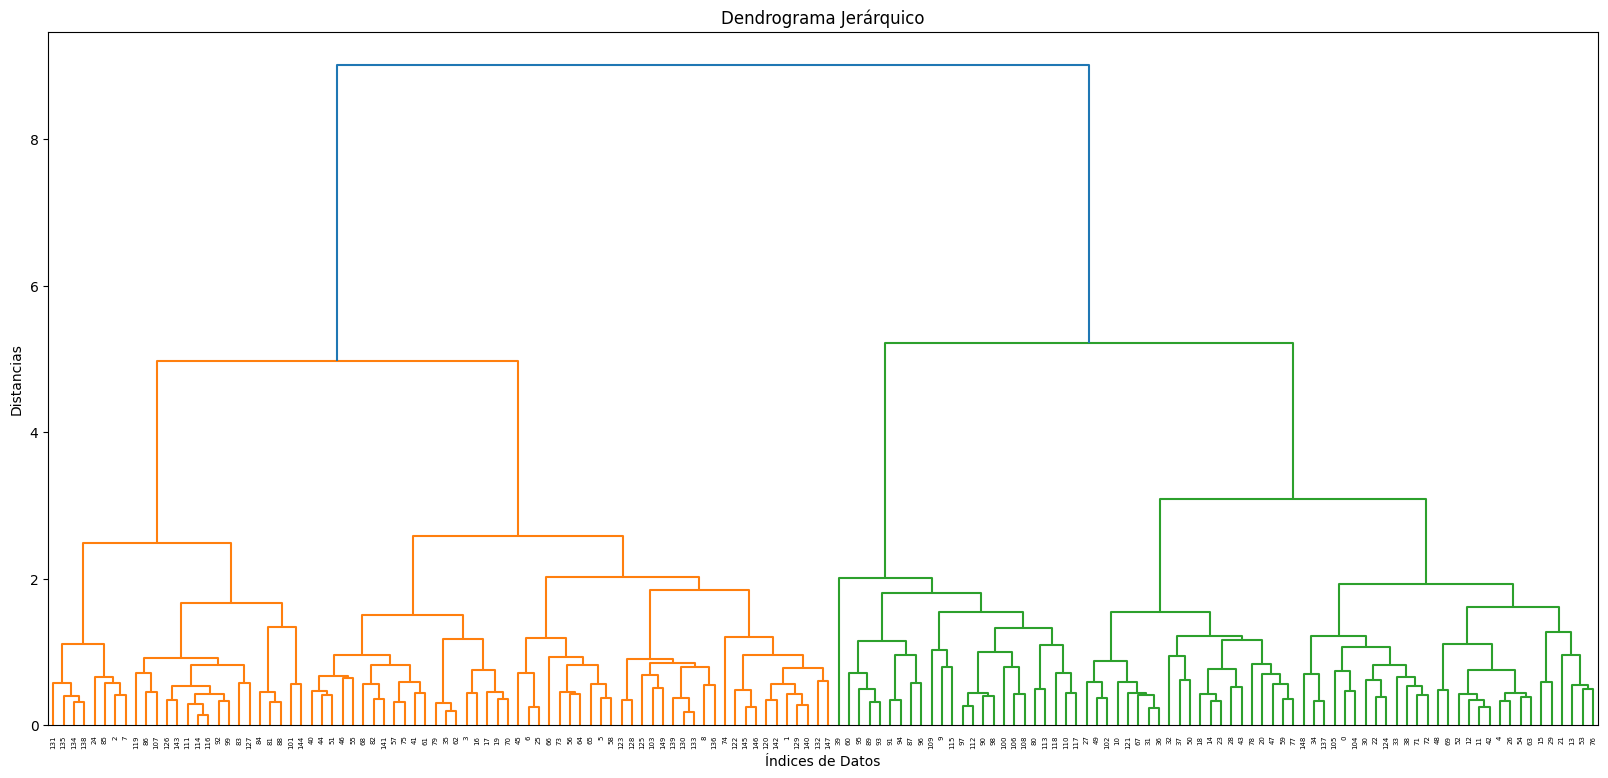

In [13]:
plt.figure(figsize=(20, 9))

#Se crea el dendrograma
dendrogram = sch.dendrogram(Clustering_Jerarquico)


plt.xlabel('Índices de Datos')
plt.ylabel('Distancias')
plt.title('Dendrograma Jerárquico')

#Muestra el dendrograma
plt.show()

El corte del dendrograma es en la distancia 2

In [14]:
from sklearn.cluster import AgglomerativeClustering

# Crea un modelo de Clustering Jerárquico con el número deseado de clústeres
clustering_model = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')

# Entrena el modelo en labeled_songs
labels = clustering_model.fit_predict(labeled_songs_normalizado)


C:\Users\56996\jupyter\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Se añade a labeled_songs una nueva columna con los clusters de Jerarquizacion**

In [15]:
labeled_songs['Clustering Jerarquico'] = labels


In [16]:
labeled_songs.head()

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,KMeans_Clusters,Clustering Jerarquico
0,1445,1445,0.755,0.561,0,-9.178,1,0.0467,0.00188,0.009390,...,https://api.spotify.com/v1/tracks/7rjkEHShjeeB...,https://api.spotify.com/v1/audio-analysis/7rjk...,168046,4,Dark Trap,500 on Me,NaN,NaN,1,0
1,2540,2540,0.516,0.649,6,-4.307,0,0.1940,0.59100,0.000018,...,https://api.spotify.com/v1/tracks/75bfH2B3aSMK...,https://api.spotify.com/v1/audio-analysis/75bf...,204800,3,Dark Trap,Taurine,NaN,NaN,0,6
2,3219,3219,0.633,0.931,4,-5.172,0,0.0342,0.04650,0.947000,...,https://api.spotify.com/v1/tracks/6hlGRsmAUTXe...,https://api.spotify.com/v1/audio-analysis/6hlG...,272000,4,Dark Trap,Elayshun,NaN,NaN,0,8
3,464,464,0.785,0.442,8,-13.061,0,0.4440,0.11100,0.000067,...,https://api.spotify.com/v1/tracks/62vRjmpzgvqI...,https://api.spotify.com/v1/audio-analysis/62vR...,151385,4,Dark Trap,Manny,NaN,NaN,0,7
4,1451,1451,0.857,0.731,1,-6.354,1,0.0754,0.08220,0.000364,...,https://api.spotify.com/v1/tracks/0TKg8mG9qQX3...,https://api.spotify.com/v1/audio-analysis/0TKg...,152880,4,Dark Trap,Naloxone,NaN,NaN,1,3


## Mapeos Etiquetas de cluster con los generos

In [17]:
# Crear un diccionario que mapee las etiquetas de cluster a géneros
cluster_genre_mapping_kmeans = {}
cluster_genre_mapping_agglomerative = {}

# Obtener las etiquetas únicas de cluster de K-Means y Clustering Jerárquico
unique_kmeans_labels = np.unique(clustering.labels_)
unique_agglomerative_labels = np.unique(labels)

# Asignar géneros para K-Means
for label in unique_kmeans_labels:
    # Filtrar las canciones que pertenecen al cluster actual
    songs_in_cluster = labeled_songs[clustering.labels_ == label]
    
    # Calcular el género más común en ese cluster
    most_common_genre = songs_in_cluster['genre'].mode().iloc[0]
    
    # Asignar el género al cluster
    cluster_genre_mapping_kmeans[label] = most_common_genre

# Asignar géneros para Clustering Jerárquico
for label in unique_agglomerative_labels:
    # Filtrar las canciones que pertenecen al cluster actual
    songs_in_cluster = labeled_songs[labels == label]
    
    # Calcular el género más común en ese cluster
    most_common_genre = songs_in_cluster['genre'].mode().iloc[0]
    
    # Asignar el género al cluster
    cluster_genre_mapping_agglomerative[label] = most_common_genre



In [18]:
cluster_genre_mapping_agglomerative

{0: 'Emo',
 1: 'Emo',
 2: 'hardstyle',
 3: 'Underground Rap',
 4: 'techhouse',
 5: 'techno',
 6: 'Dark Trap',
 7: 'Rap',
 8: 'dnb'}

In [19]:
 cluster_genre_mapping_kmeans

{0: 'dnb', 1: 'Emo'}

## Predicción de datos en Spotify_dataset para K-MEANS

Se quitan columnas no relevantes, luego normalizo los datos de spotify_dataset para luego predecir los datos con el modelo clustering que contiene la informacion de labeled_songs

In [20]:
columnas_a_eliminar = ['Unnamed: 0.1', 'song_index', 'id', 'uri', 'song_name', 'track_href', 'analysis_url', 'title', 'Unnamed: 0','type']

#Eliminamos las columnas no relevantes
spotify_dataset_variables = spotify_dataset.drop(columnas_a_eliminar, axis=1)

#Normalizamos los datos
spotify_dataset_norm = (spotify_dataset_variables-spotify_dataset_variables.min())/(spotify_dataset_variables.max()-spotify_dataset_variables.min())

#Almacenaremos los resultados predecidos en predicted_clusters
predicted_clusters = clustering.predict(spotify_dataset_norm)

spotify_dataset['KMeans_Clusters'] = predicted_clusters

spotify_dataset

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,Unnamed: 0,title,KMeans_Clusters
0,0,0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Mercury: Retrograde,NaN,NaN,1
1,1,1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Pathology,NaN,NaN,1
2,2,2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Symbiote,NaN,NaN,1
3,3,3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,1
4,4,4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Venom,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,42300,42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,NaN,20995.0,Euphoric Hardstyle,1
42301,42301,42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,NaN,20996.0,Greatest Hardstyle Playlist,0
42302,42302,42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,NaN,20997.0,Best of Hardstyle 2020,1
42303,42303,42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,NaN,20998.0,Euphoric Hardstyle,0


## Entrenamiento para obtener cluster jerárquicos de spotify_dataset

Modelo

In [21]:
labels_spotify = clustering_model.fit_predict(spotify_dataset_norm)
spotify_dataset['Clusters_Jerárquizacion'] = labels_spotify

C:\Users\56996\jupyter\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Asignas columnas de cluster a etiqueta de genero de ambos metodos clustering trabajados en este proyecto

In [22]:
# Asignar géneros a las canciones en función de las etiquetas de K-Means
spotify_dataset['Genero_kmeans'] = spotify_dataset['KMeans_Clusters'].map(cluster_genre_mapping_kmeans)

# Asignar géneros a las canciones en función de las etiquetas de Clustering Jerárquico
spotify_dataset['Genero_Jerárquico'] = spotify_dataset['Clusters_Jerárquizacion'].map(cluster_genre_mapping_agglomerative)


In [23]:
spotify_dataset.head(10000)

,Unnamed: 0.1,song_index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,analysis_url,duration_ms,time_signature,song_name,Unnamed: 0,title,KMeans_Clusters,Clusters_Jerárquizacion,Genero_kmeans,Genero_Jerárquico
0,0,0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Mercury: Retrograde,NaN,NaN,1,4,Emo,techhouse
1,1,1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Pathology,NaN,NaN,1,3,Emo,Underground Rap
2,2,2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Symbiote,NaN,NaN,1,3,Emo,Underground Rap
3,3,3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,1,4,Emo,techhouse
4,4,4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Venom,NaN,NaN,1,4,Emo,techhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,0.695,0.609,0,-3.638,0,0.0912,0.189000,0.000000,...,https://api.spotify.com/v1/audio-analysis/54PA...,256026,4,Stack That Dough,NaN,NaN,0,5,dnb,techno
9996,9996,9996,0.716,0.541,1,-7.909,1,0.1490,0.002100,0.000000,...,https://api.spotify.com/v1/audio-analysis/2bSk...,247055,4,Life Goes On,NaN,NaN,1,4,Emo,techhouse
9997,9997,9997,0.831,0.630,2,-7.025,1,0.1780,0.152000,0.000000,...,https://api.spotify.com/v1/audio-analysis/6sY0...,147808,4,Serve,NaN,NaN,1,4,Emo,techhouse
9998,9998,9998,0.856,0.729,7,-7.035,1,0.1800,0.056400,0.000000,...,https://api.spotify.com/v1/audio-analysis/6yIm...,145945,4,Air Max,NaN,NaN,1,3,Emo,Underground Rap


## Se asigna cada gusto del usuario, es decir su cancion al genero que le pertenece con KMEANS Y JERARQUIZACION

In [24]:
import pandas as pd


song_genre_mapping = dict(zip(spotify_dataset['song_index'], spotify_dataset['Genero_kmeans']))


user_preferences['Genero de la cancion Kmeans'] = user_preferences[' 10640'].map(song_genre_mapping)


song_genre_mapping_jerar = dict(zip(spotify_dataset['song_index'], spotify_dataset['Genero_Jerárquico']))


user_preferences['Genero de la cancion JERARQUIZACION'] = user_preferences[' 10640'].map(song_genre_mapping_jerar)


In [25]:
user_preferences.head(45)

,0,10640,Genero de la cancion Kmeans,Genero de la cancion JERARQUIZACION
0,0,12083,Emo,Emo
1,0,4440,dnb,Emo
2,0,3841,dnb,techno
3,1,27795,dnb,Emo
4,1,30052,Emo,Emo
5,1,28454,Emo,Emo
6,1,29842,Emo,Emo
7,1,28312,dnb,Emo
8,2,38660,Emo,Emo
9,2,30030,Emo,Emo


## Algoritmo de recomendacion de canciones para los usuarios con clusters Kmeans

In [26]:
import pandas as pd

for user_id, group in user_preferences.groupby('0'):
    
    user_genre = group['Genero de la cancion Kmeans'].values[0]
    filtered_songs = spotify_dataset[spotify_dataset['Genero_kmeans'] == user_genre]
    
    top_recommendations = filtered_songs.head(10)
    print(f'Recomendaciones para el usuario {user_id}:')
    print(top_recommendations[['song_name', 'Genero_kmeans']])





Recomendaciones para el usuario 0:
                                       song_name Genero_kmeans
0                            Mercury: Retrograde           Emo
1                                      Pathology           Emo
2                                       Symbiote           Emo
3  ProductOfDrugs (Prod. The Virus and Antidote)           Emo
4                                          Venom           Emo
5                                        Gatteka           Emo
6                             kamikaze (+ pulse)           Emo
7            T.R.U. (Totally Rotten Underground)           Emo
8                   I Put My Dick in Your Mental           Emo
9                                      Andromeda           Emo
Recomendaciones para el usuario 1:
       song_name Genero_kmeans
13     Sacrifice           dnb
18   Io sono qui           dnb
23         Hades           dnb
24         Nails           dnb
26      No Teeth           dnb
32   Coffin Wave           dnb
33         OhNo!    

## Algoritmo de recomendacion de canciones para los usuarios con clusters JERARQUIZACION

In [27]:
import pandas as pd

for user_id, group in user_preferences.groupby('0'):
    
    user_genre = group['Genero de la cancion JERARQUIZACION'].values[0]
    filtered_songs = spotify_dataset[spotify_dataset['Genero_Jerárquico'] == user_genre]
    
    top_recommendations = filtered_songs.head(10)
    print(f'Recomendaciones para el usuario {user_id}:')
    print(top_recommendations[['song_name', 'Genero_Jerárquico']])

Recomendaciones para el usuario 0:
                                   song_name Genero_Jerárquico
32                               Coffin Wave               Emo
33                                     OhNo!               Emo
61                                  Overload               Emo
77   A Death In The Ocean Would Be Beautiful               Emo
87                                 Kali Yuga               Emo
89                                  Caligula               Emo
97                As Above so Look out Below               Emo
108                                     HDMI               Emo
164                           Look at Me Now               Emo
165                              Bulletproof               Emo
Recomendaciones para el usuario 1:
                                   song_name Genero_Jerárquico
32                               Coffin Wave               Emo
33                                     OhNo!               Emo
61                                  Overload    

## Cambie la metodología usada para determinar el numero óptimo de clusters. Razone porque hay cambios (o porque no los hay)

En este proyecto se uso el metodo de k-means y de jerarquizacion, en el cual obtuve 2 y 9 respectivamente, el numero óptimo de clusters cambio debido a que al trabajar con un dendograma se puede elegir un numero de clusters diferente, en funcion del nivel del dendrograma, lo cual hace mas flexible la eleccion del numero de clusters optimos